In [25]:
import pandas as pd
import numpy as np
import likelycause2
import seaborn as sns

### Preparing the dataset

In [26]:
df = pd.read_csv('bq_weather2.csv')
df['date_local'] = pd.to_datetime(df['date_local'])

### Likelycause2.last_period

#### Description:
The last period function is a utility function that builds variation variables in a dataframe.
Variations are defined between moment t and a moment in the past.

#### Arguments:

- df (pd.DataFrame): the dataframe
- unique_id (string): unique identifier of each line. Must be unique, and can only be 1 column
- interval (string): what is the interval you want to calculate variations for. Accepts days, weeks and hours
- periods (int): number of periods you want to look back on that interval. For last variations, for example, the argument period would be 1
- date_column (string): the date column in your dateframe. Must be a datetime. To convert, use pandas.to_datetime function
- to_past (list): list of columns you want to calculate the variations for

#### Returns:
Returns the dataframe that was inputed with additinal columns named v+name of the columns in the to_past argument. Those columns represent the variation of that variable between moment t and t-periods. This variation is calculated as (Variable in moment t)/(Variable in moment t-periods).


In [ ]:
likelycause2.last_period(
    df = df,
    unique_id='site_num',
    interval = 'days',
    periods = 1,
    date_column = 'date_local',
    to_past = ['co_mean','hap_mean','lead_mean','o2_mean','o3_mean','t_mean']
)

### Visualizing the data

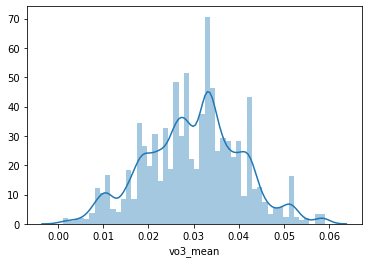

In [6]:
sns.distplot(df['vo3_mean'])

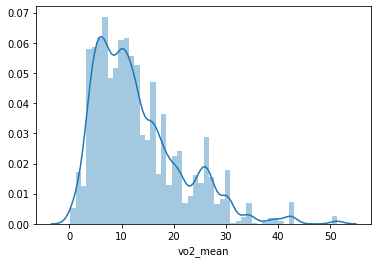

In [7]:
sns.distplot(df['vo2_mean'])

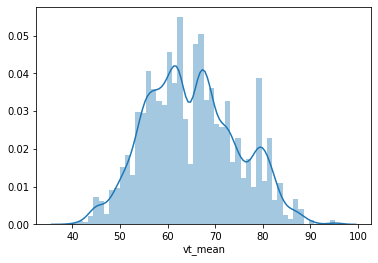

In [8]:
sns.distplot(df['vt_mean'])

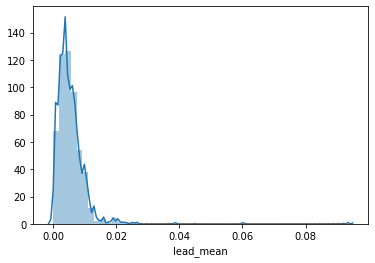

In [9]:
sns.distplot(df['lead_mean'])

### Implementation of the package in a single point

In [16]:
event='vo3_mean'
suspects=['vlead_mean','vo2_mean','vt_mean']
list1 = suspects.copy()
list1.append(event)

df_bayes = pd.DataFrame()

i = 1
dic = pd.DataFrame(df[list1].iloc[i]).to_dict()
point = dic[i]
dfb = likelycause2.bayes_suspects(df,event,suspects,point)
dfb['obs'] = i
    
df_bayes = pd.concat([df_bayes,dfb])

df_bayes = pd.merge(df_bayes,df,how='left',left_on='obs',right_on=df.index)

df_bayes

,name,number_of_variables,prob_ba,number_type,prob_b,prob_a,pbayes,subtract,pbayes_attribution,obs,...,o3_mean,t_mean,num,l1d,vco_mean,vhap_mean,vlead_mean,vo2_mean,vo3_mean,vt_mean
0,"('vlead_mean',)",1,0.640155,Odd,0.737784,0.096296,0.083553,-0.048550,0.132104,1,...,0.027,60.833333,1,2018-11-21,0.266571,0.2,0.00477,7.0,0.027,60.833333
1,"('vo2_mean',)",1,0.999977,Odd,0.959943,0.096296,0.100312,-0.042964,0.143276,1,...,0.027,60.833333,1,2018-11-21,0.266571,0.2,0.00477,7.0,0.027,60.833333
2,"('vt_mean',)",1,0.898974,Odd,0.968687,0.096296,0.089366,-0.091515,0.180881,1,...,0.027,60.833333,1,2018-11-21,0.266571,0.2,0.00477,7.0,0.027,60.833333
3,"('vlead_mean', 'vo2_mean')",2,0.000000,Even,0.999936,0.096296,0.000000,0.000000,0.000000,1,...,0.027,60.833333,1,2018-11-21,0.266571,0.2,0.00477,7.0,0.027,60.833333
4,"('vlead_mean', 'vt_mean')",2,1.000000,Even,0.991716,0.096296,0.097100,0.000000,0.097100,1,...,0.027,60.833333,1,2018-11-21,0.266571,0.2,0.00477,7.0,0.027,60.833333
5,"('vo2_mean', 'vt_mean')",2,0.865133,Even,0.969507,0.096296,0.085929,0.000000,0.085929,1,...,0.027,60.833333,1,2018-11-21,0.266571,0.2,0.00477,7.0,0.027,60.833333
6,"('vlead_mean', 'vo2_mean', 'vt_mean')",3,0.000000,Odd,1.000000,0.096296,0.000000,0.000000,0.000000,1,...,0.027,60.833333,1,2018-11-21,0.266571,0.2,0.00477,7.0,0.027,60.833333


### Implementation of the package in a dataframe

### Likelycause2.bayes_suspects

#### Description:
The bayes_suspects function calculates the conditional probabilities of the event and each suspicious causes or a combination of those causes. 
It also suggests an attribution to each individual cause, by adjusting the intersections of causes

#### Arguments:

- df (pd.DataFrame): the dataframe
- event (string): name of the column that contains the event that we want to explain
- suspects (list): list with name of the columns that contains the potential causes for what we want to explain
- point (dictionary): dictionary with the point for which we want to calculate the probability. Must be a combination of the cause and all the individual points of suspects

#### Returns:
Returns a dataframe with all the possible probabilities combinations, and the conditional probabilities:

- name: name of that conditional combination. If it has one event, it represents P(event|a). If it has 2 events it represents P(event1 & event2|a)
- prob_ba: P(cause | event)
- prob_a: P(cause)
- prob_b: P(event)
- pbayes: confitional probability
- pbayes_attribution: suggested probability attribution if we want to attribute to individual causes


In [11]:
event='vo3_mean'
suspects=['vlead_mean','vo2_mean','vt_mean']
list1 = suspects.copy()
list1.append(event)

df_bayes = pd.DataFrame()

for i in range(0,3):

    dic = pd.DataFrame(df[list1].iloc[i]).to_dict()
    point = dic[i]
    dfb = likelycause2.bayes_suspects(df,event,suspects,point)
    dfb['obs'] = i
    
    df_bayes = pd.concat([df_bayes,dfb])

In [24]:
df_bayes

,name,number_of_variables,prob_ba,number_type,prob_b,prob_a,pbayes,subtract,pbayes_attribution,obs,...,o3_mean,t_mean,num,l1d,vco_mean,vhap_mean,vlead_mean,vo2_mean,vo3_mean,vt_mean
0,"('vlead_mean',)",1,0.640155,Odd,0.737784,0.096296,0.083553,-0.048550,0.132104,1,...,0.027,60.833333,1,2018-11-21,0.266571,0.2,0.00477,7.0,0.027,60.833333
1,"('vo2_mean',)",1,0.999977,Odd,0.959943,0.096296,0.100312,-0.042964,0.143276,1,...,0.027,60.833333,1,2018-11-21,0.266571,0.2,0.00477,7.0,0.027,60.833333
2,"('vt_mean',)",1,0.898974,Odd,0.968687,0.096296,0.089366,-0.091515,0.180881,1,...,0.027,60.833333,1,2018-11-21,0.266571,0.2,0.00477,7.0,0.027,60.833333
3,"('vlead_mean', 'vo2_mean')",2,0.000000,Even,0.999936,0.096296,0.000000,0.000000,0.000000,1,...,0.027,60.833333,1,2018-11-21,0.266571,0.2,0.00477,7.0,0.027,60.833333
4,"('vlead_mean', 'vt_mean')",2,1.000000,Even,0.991716,0.096296,0.097100,0.000000,0.097100,1,...,0.027,60.833333,1,2018-11-21,0.266571,0.2,0.00477,7.0,0.027,60.833333
5,"('vo2_mean', 'vt_mean')",2,0.865133,Even,0.969507,0.096296,0.085929,0.000000,0.085929,1,...,0.027,60.833333,1,2018-11-21,0.266571,0.2,0.00477,7.0,0.027,60.833333
6,"('vlead_mean', 'vo2_mean', 'vt_mean')",3,0.000000,Odd,1.000000,0.096296,0.000000,0.000000,0.000000,1,...,0.027,60.833333,1,2018-11-21,0.266571,0.2,0.00477,7.0,0.027,60.833333
